In [1]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import numpy as np
import random
import os
import pygame

pygame 2.5.0 (SDL 2.28.0, Python 3.10.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import os
model_path = r"C:\Users\Kishor\Documents\emotion_model.h5"
emotion_model = load_model("C:\\Users\\mithu\\Documents\\emotion_model.h5")
print(" Emotion model loaded successfully")

 Emotion model loaded successfully


Webcam accessed. Please look at the camera...
Detected emotion: sad
Emotion scores: {'angry': 13.644197583198547, 'disgust': 0.0002472196001690463, 'fear': 1.00481566041708, 'happy': 0.1174811739474535, 'sad': 70.27526497840881, 'surprise': 0.00035057830700679915, 'neutral': 14.957647025585175}


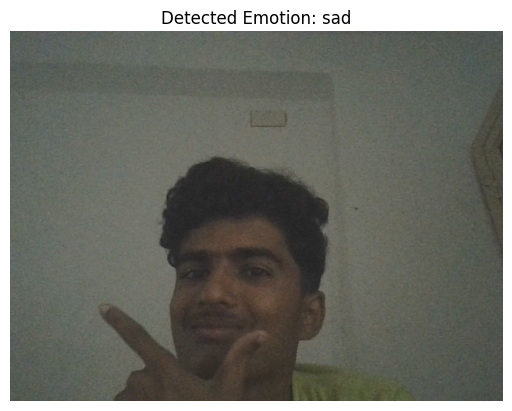

In [3]:
def detect_emotion():
    try:
        import time  
        import tempfile  

        cap = cv2.VideoCapture(0)
        if not cap.isOpened():
            raise Exception("Could not open video device")

        print("Webcam accessed. Please look at the camera...")
        time.sleep(3)

        ret, frame = cap.read()
        if not ret:
            raise Exception("Could not read frame from camera")

        with tempfile.NamedTemporaryFile(suffix='.jpg', delete=False) as tmp_file:
            temp_img_path = tmp_file.name
            cv2.imwrite(temp_img_path, frame)

        cap.release()
        cv2.destroyAllWindows()

        result = DeepFace.analyze(img_path=temp_img_path, actions=['emotion'])
        os.remove(temp_img_path)

        dominant_emotion = result[0]['dominant_emotion']
        emotion_scores = result[0]['emotion']

        print(f"Detected emotion: {dominant_emotion}")
        print("Emotion scores:", emotion_scores)

        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Detected Emotion: {dominant_emotion}")
        plt.show()

        return dominant_emotion.lower()

    except Exception as e:
        print(f"Error in emotion detection: {str(e)}")
        return None
detected_emotion = detect_emotion()

In [5]:
import random
import vlc
import os

emotion_to_song = {
    "happy": [
        r"C:\Users\mithu\Music\happy\Justin Timberlake - CAN_T STOP THE FEELING_ (from DreamWorks Animation_s *TROLLS*) (Official Video)(M4A_128K).m4a",
        r"C:\Users\mithu\Music\happy\Mark Ronson - Uptown Funk (Official Video) ft. Bruno Mars(M4A_128K).m4a",
        r"C:\Users\mithu\Music\happy\Pharrell Williams - Happy (Video)(M4A_128K).m4a"
    ],
    "sad": [
        r"C:\Users\mithu\Music\sad\Adele - Someone Like You (Official Music Video)(M4A_128K).m4a",
        r"C:\Users\mithu\Music\sad\Johnny Cash - Hurt(M4A_128K).m4a",
        r"C:\Users\mithu\Music\sad\Sam Smith - Stay With Me (Official Music Video)(M4A_128K).m4a"
    ],
    "neutral": [
        r"C:\Users\mithu\Music\neutral\Coldplay - Clocks (Official Video)(M4A_128K).m4a",
        r"C:\Users\mithu\Music\neutral\Ed Sheeran - Perfect (Official Music Video)(M4A_128K).m4a",
        r"C:\Users\mithu\Music\neutral\Post Malone_ Swae Lee - Sunflower (Spider-Man_ Into the Spider-Verse) (Official Video)(M4A_128K).m4a"
    ],
    "fear": [
        r"C:\Users\mithu\Music\fear\Michael Jackson - Thriller (Official Video - Shortened Version)(MP3_320K).mp3",
        r"C:\Users\mithu\Music\fear\Rihanna - Disturbia(MP3_320K).mp3",
        r"C:\Users\mithu\Music\fear\Rockwell - Somebody_s Watching Me (Official Music Video)(MP3_320K).mp3"
    ],
    "disgust": [
        r"C:\Users\mithu\Music\disgust\BTS-UGH-(HipHopKit.com).mp3",
        r"C:\Users\mithu\Music\disgust\Radiohead - Creep(MP3_320K).mp3",
        r"C:\Users\mithu\Music\disgust\Three_Days_Grace_-*I_Hate_Everything_About_You*(Rilds.com).mp3"
    ],
    "surprise": [
        r"C:\Users\mithu\Music\surprise\Jack Garratt -  *Surprise Yourself* (Lyrics)(MP3_320K).mp3",
        r"C:\Users\mithu\Music\surprise\KT Tunstall - Suddenly I See (Official Video)(MP3_320K).mp3",
        r"C:\Users\mithu\Music\surprise\Taylor Swift - I Can Do It With A Broken Heart (Official Video)(MP3_320K).mp3"
    ],
    "angry": [
        r"C:\Users\mithu\Music\angry\Drowning Pool - Bodies (Official HD Music Video)(M4A_128K).m4a",
        r"C:\Users\mithu\Music\angry\Limp Bizkit - Break Stuff (Official Music Video)-yt.savetube.me.mp3",
        r"C:\Users\mithu\Music\angry\Rage Against The Machine - Killing In the Name (Official HD Video)(M4A_128K).m4a",
        r"C:\Users\mithu\Music\angry\Slipknot - Duality [OFFICIAL VIDEO] [HD](M4A_128K).m4a"
    ]
}

player = None  

def play_song(emotion):
    global player
    if emotion in emotion_to_song:
        try:
            song = random.choice(emotion_to_song[emotion])
            if player:
                player.stop()  
            
            player = vlc.MediaPlayer(song)
            player.play()
            print(f"🎵 Now playing: {os.path.basename(song)}")
            return True
        except Exception as e:
            print(f" Error playing song: {e}")
            return False
    else:
        print(" No songs found for this emotion.")
        return False

def stop_song():
    global player
    if player:
        player.stop()
        print(" Music playback stopped.")
    else:
        print("No music is playing currently.")



play_song(detected_emotion)
#stop_song()

🎵 Now playing: Coldplay - Clocks (Official Video)(M4A_128K).m4a


True